In [10]:
import matplotlib.pyplot as plt
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, pearsonr


COMPUTER_NAME = '/home/renata'

#python3

ENCODE = 'latin1'
print('Using python {0}'.format(sys.version_info[0]))

Using python 2


# B

In [5]:
with open('{0}/locomotion_principles/article_figs/Fig5/PlotVoxelsInFeet.pickle'.format(COMPUTER_NAME), 'rb') as handle:
    data = pickle.load(handle)

/home/renata/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


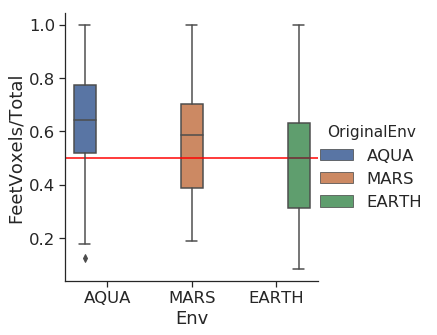

In [14]:
sns.set(font_scale=1.5)  
sns.set_style("white")
sns.set_style('ticks')
g = sns.catplot(
    data=data[data.JustOriginal == True][data.Type == 'BEST']
    , kind = 'box',
    x = 'Env', y="FeetVoxels/Total",hue='OriginalEnv', #col='Type',
    ci = 95
    )
xmax = 2.5
xmin = -0.5
for ax in g.axes.flat:
    ax.hlines(0.5,xmin,xmax,'red')
plt.xlim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.savefig('Boxplot.png')

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('FeetVoxels_Total ~ C(Env)', data=data[(data.JustOriginal == True) & (data.Type == 'BEST')]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Env),0.449048,2.0,4.85332,0.009097
Residual,6.800507,147.0,NaN,NaN


# C

In [9]:
with open('{0}/locomotion_principles/article_figs/Fig5/WaveInfosForFig5Article.pickle'.format(COMPUTER_NAME), 'rb') as handle:
    WaveInfos = pickle.load(handle)

('AQUA->MARS', -0.3904952989971818, 7.638192689857588e-13, -0.37561194773266754, 6.334380026309515e-12)
('AQUA->EARTH', -0.42831538533683317, 2.85282763101828e-17, -0.41961879128196666, 1.422522355114539e-16)
('MARS->EARTH', -0.31800545690385074, 1.0297125819490061e-08, -0.31730888267582463, 1.1131006209783888e-08)


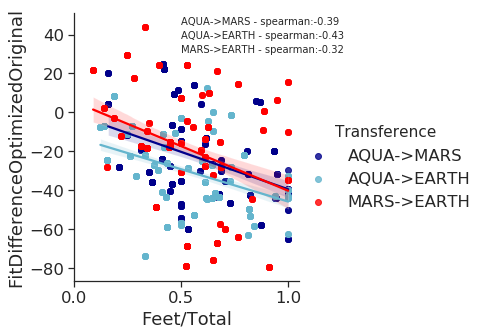

In [15]:
g = sns.lmplot(data=WaveInfos
        ,x='Feet/Total',y='FitDifferenceOptimizedOriginal', 
        hue_order = ['AQUA->MARS','AQUA->EARTH','MARS->EARTH'],hue = 'Transference',
        truncate = True,palette = ['darkblue','c','red'],aspect = 1
        )

j =0
for transference in ['AQUA->MARS','AQUA->EARTH','MARS->EARTH']:
        WaveDF= WaveInfos[WaveInfos.Transference == transference]
        rs, pvalues = spearmanr(list(WaveDF['Feet/Total']),list(WaveDF['FitDifferenceOptimizedOriginal']))
        rp, pvaluep = pearsonr(list(WaveDF['Feet/Total']),list(WaveDF['FitDifferenceOptimizedOriginal']))
        print(transference,rs,pvalues,rp,pvaluep)
        plt.text(0.5, 45 - j,'{0} - spearman:{1}'.format(transference,round(rs,2),round(rp,2)), fontsize=10) #add text
        j+= 7

plt.xlim(0,1.05)
plt.savefig('Correlation.png')